In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [3]:
# Use some functions from tensorflow_docs
# !pip install -q git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [118]:
Indianapolis_Housing = pd.read_csv("Indianapolis_Housing_Cleaned.csv")
Indianapolis_Housing.head()
Indianapolis_Housing = Indianapolis_Housing[Indianapolis_Housing.Year >= 2010]
Indianapolis_Housing = Indianapolis_Housing.drop(["Unnamed: 0", "Unnamed: 0.1", "Year", "Date",\
                                                  "Median Market Value (Single Family)", "Median Bedroom Price",\
                                                  "Median List Price Calculated"], axis=1)
Indianapolis_Housing

,Integer_Year,Median List Price per SqFt Calculated,Month,No. of Bedrooms,Zip_Code
13,15,116.973244,1,1,46220
14,16,121.058559,1,1,46220
15,17,114.574016,1,1,46220
16,18,128.642487,1,1,46220
17,19,124.783862,1,1,46220
...,...,...,...,...,...
4745,20,75.297652,12,5,46214
4746,21,71.947874,12,5,46214
4747,22,79.283366,12,5,46214
4748,23,91.824038,12,5,46214


In [119]:
#X = Indianapolis_Housing_February[["Integer_Year", "Zip_Code_Integer", "No. of Bedrooms", 
                                   #"Median Market Value (Single Family)",
                                  #"Median List Price per SqFt Calculated",
                                  #"Median List Price Calculated"]].values

#y = Indianapolis_Housing_February["Median Bedroom Price"].values
#y = y.reshape(-1, 1)
#print(X.shape, y.shape)

In [120]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [121]:
#X_train, X_test, y_train, y_test = train_test_split(
    #X, y, random_state=1)

In [122]:
#X_scaler = MinMaxScaler().fit(X_train)
#y_scaler = MinMaxScaler().fit(y_train)
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [124]:
Indianapolis_Housing['Zip_Code'] = Indianapolis_Housing['Zip_Code'].map({46220: '46220', 46219: '46219', 46227: '46227', 46214: '46214'})
Indianapolis_Housing = pd.get_dummies(Indianapolis_Housing,columns=["Zip_Code"], prefix='', prefix_sep='')

Indianapolis_Housing["No. of Bedrooms"] = Indianapolis_Housing['No. of Bedrooms'].map({1: '1 Bedroom', 2: '2 Bedroom', 3: '3 Bedroom', 4: '4 Bedroom', 5: '5 Bedroom'})
Indianapolis_Housing = pd.get_dummies(Indianapolis_Housing,columns=["No. of Bedrooms"], prefix='', prefix_sep='')

Indianapolis_Housing["Month"] = Indianapolis_Housing['Month'].map({1: 'January', 2: 'February', 3: 'March',
                                                                   4: 'April', 5: 'May', 6: 'June',
                                                                   7: 'July', 8: 'August', 9: 'September',
                                                                   10: 'October', 11: 'November', 12: 'December'})
Indianapolis_Housing = pd.get_dummies(Indianapolis_Housing,columns=["Month"], prefix='', prefix_sep='')

Indianapolis_Housing

KeyError: 'Zip_Code'

In [125]:
Indianapolis_Housing.columns

Index(['Integer_Year', 'Median List Price per SqFt Calculated', '46214',
       '46219', '46220', '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom',
       '4 Bedroom', '5 Bedroom', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September'],
      dtype='object')

In [126]:
# Indianapolis_Housing.to_csv("Indianapolis_Housing_Predictions.csv")

In [127]:
train_dataset = Indianapolis_Housing.sample(frac=0.8,random_state=0)
test_dataset = Indianapolis_Housing.drop(train_dataset.index)

In [128]:
#sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [129]:
train_stats = train_dataset.describe()
train_stats.pop("Median List Price per SqFt Calculated")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Integer_Year,1953.0,19.615463,2.942604,15.0,17.0,20.0,22.0,25.0
46214,1953.0,0.242704,0.428827,0.0,0.0,0.0,0.0,1.0
46219,1953.0,0.248336,0.432158,0.0,0.0,0.0,0.0,1.0
46220,1953.0,0.258065,0.437682,0.0,0.0,0.0,1.0,1.0
46227,1953.0,0.250896,0.433640,0.0,0.0,0.0,1.0,1.0
1 Bedroom,1953.0,0.190988,0.393180,0.0,0.0,0.0,0.0,1.0
2 Bedroom,1953.0,0.205837,0.404416,0.0,0.0,0.0,0.0,1.0
3 Bedroom,1953.0,0.204301,0.403293,0.0,0.0,0.0,0.0,1.0
4 Bedroom,1953.0,0.198157,0.398713,0.0,0.0,0.0,0.0,1.0
5 Bedroom,1953.0,0.200717,0.400639,0.0,0.0,0.0,0.0,1.0


In [130]:
train_labels = train_dataset.pop("Median List Price per SqFt Calculated")
test_labels = test_dataset.pop("Median List Price per SqFt Calculated")

In [131]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [132]:
train_dataset.columns

Index(['Integer_Year', '46214', '46219', '46220', '46227', '1 Bedroom',
       '2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', 'April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')

In [133]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [134]:
model = build_model()

In [135]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1472      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,697
Trainable params: 5,697
Non-trainable params: 0
_________________________________________________________________


In [136]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.26787338],
       [ 0.16218096],
       [ 0.08661722],
       [ 0.08953816],
       [ 0.89993703],
       [ 0.7822533 ],
       [-0.1462408 ],
       [ 0.6881495 ],
       [ 0.21004666],
       [ 0.4529076 ]], dtype=float32)

In [137]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:9157.4267,  mae:90.1638,  mse:9157.4268,  val_loss:7803.6142,  val_mae:82.8491,  val_mse:7803.6143,  
....................................................................................................
Epoch: 100, loss:6.7647,  mae:1.9644,  mse:6.7647,  val_loss:11.0677,  val_mae:2.5920,  val_mse:11.0677,  
....................................................................................................
Epoch: 200, loss:5.3295,  mae:1.6838,  mse:5.3295,  val_loss:9.9664,  val_mae:2.4227,  val_mse:9.9664,  
....................................................................................................
Epoch: 300, loss:3.8602,  mae:1.4504,  mse:3.8602,  val_loss:10.4519,  val_mae:2.4504,  val_mse:10.4519,  
....................................................................................................
Epoch: 400, loss:3.4260,  mae:1.3612,  mse:3.4260,  val_loss:9.3618,  val_mae:2.3539,  val_mse:9.3618,  
......................................................

In [138]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
#print(hist["mse"].max())

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.049446,1.041286,2.049446,9.374491,2.339757,9.374491,995
996,1.899946,1.005392,1.899947,9.358198,2.329623,9.358197,996
997,2.054541,1.046586,2.054541,8.841883,2.252895,8.841882,997
998,2.052260,1.047737,2.052260,9.142134,2.289797,9.142134,998
999,2.061020,1.033958,2.061020,9.454328,2.308683,9.454329,999


In [139]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Median Bedroom Price]')

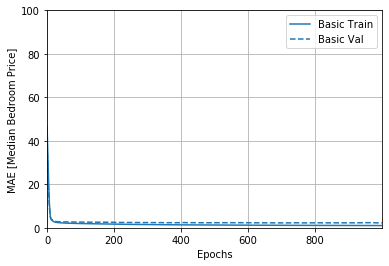

In [142]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 100000])
plt.ylabel('MAE [Median Bedroom Price]')

Text(0, 0.5, 'MSE [Median Bedroom Price]')

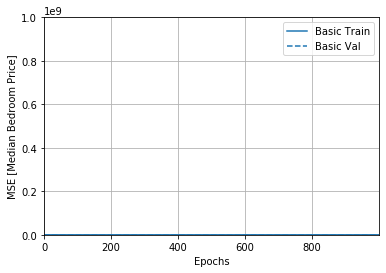

In [141]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 1000000000])
plt.ylabel('MSE [Median Bedroom Price]')

In [143]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

488/488 - 0s - loss: 8.2350 - mae: 2.2570 - mse: 8.2350
Testing set Mean Abs Error:  2.26 


In [144]:
loss, mae, mse = model.evaluate(normed_train_data, train_labels, verbose=2)

print("Training set Mean Abs Error: {:5.2f} ".format(mae))

1953/1953 - 0s - loss: 3.6287 - mae: 1.3077 - mse: 3.6287
Training set Mean Abs Error:  1.31 


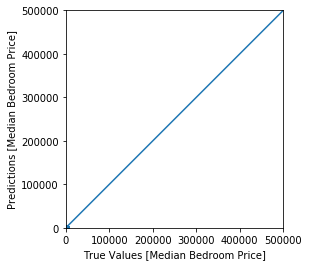

In [145]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Median Bedroom Price]')
plt.ylabel('Predictions [Median Bedroom Price]')
lims = [0, 500000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [146]:
test_predictions

array([118.739235, 124.29423 , 152.03894 , 119.458725, 125.348755,
       126.56666 ,  78.22609 ,  61.423275,  68.094795,  86.90941 ,
        63.350582,  61.55908 ,  61.438915,  64.906075,  63.012577,
        62.775585,  74.11642 ,  81.15546 ,  82.11763 , 104.95576 ,
        80.51366 ,  76.06513 , 101.15238 , 111.1295  ,  81.1999  ,
       108.58861 , 113.72783 ,  67.26402 ,  72.68548 ,  75.09412 ,
        98.20839 ,  72.95581 ,  74.4615  ,  72.94248 ,  67.804504,
        74.04031 , 100.92509 ,  71.760345,  80.710236, 124.24176 ,
       176.63844 , 160.32796 , 161.38095 , 176.20755 ,  61.75697 ,
        62.227722,  63.321934,  80.801605,  66.84675 ,  66.884445,
        65.01951 ,  67.46932 ,  65.962524,  65.70289 ,  63.831554,
        80.169266, 100.365875,  79.2117  ,  74.712395,  80.43471 ,
       113.808815, 100.948006,  73.61679 , 100.78866 ,  81.39894 ,
        82.34198 ,  91.25299 ,  96.12155 ,  74.204834,  75.07942 ,
        78.71719 ,  73.22828 ,  86.478134,  71.48496 ,  75.384

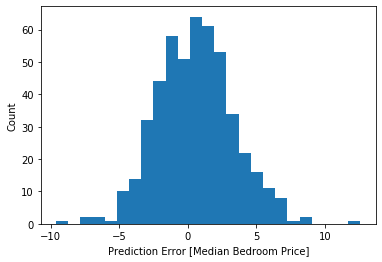

In [147]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Median Bedroom Price]")
_ = plt.ylabel("Count")

In [148]:
# model.save("Indianapolis_Housing2.h5")
# from tensorflow.keras.models import load_model
# model = load_model("Indianapolis_Housing3.h5")

In [149]:
predictionsData = pd.read_csv("predictionsDataInit.csv")
predictionsData = predictionsData.drop("Unnamed: 0", axis=1)

In [150]:
predictionsData = predictionsData[['Integer_Year', '46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September']]

predictionsData.head()

,Integer_Year,46214,46219,46220,46227,1 Bedroom,2 Bedroom,3 Bedroom,4 Bedroom,5 Bedroom,...,December,February,January,July,June,March,May,November,October,September
0,25,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,25,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,25,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,25,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,25,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [92]:
print(predictionsData.columns)
print(train_dataset.columns)

Index(['Integer_Year', '46214', '46219', '46220', '46227', '1 Bedroom',
       '2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', 'April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')
Index(['Integer_Year', '46214', '46219', '46220', '46227', '1 Bedroom',
       '2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', 'April', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September'],
      dtype='object')


In [93]:
predictionsData.dtypes

Integer_Year    int64
46214           int64
46219           int64
46220           int64
46227           int64
1 Bedroom       int64
2 Bedroom       int64
3 Bedroom       int64
4 Bedroom       int64
5 Bedroom       int64
April           int64
August          int64
December        int64
February        int64
January         int64
July            int64
June            int64
March           int64
May             int64
November        int64
October         int64
September       int64
dtype: object

In [151]:
import numpy as np
predictionsData[['46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September']] = predictionsData[['46214', '46219', '46220',
       '46227', '1 Bedroom', '2 Bedroom', '3 Bedroom', '4 Bedroom',
       '5 Bedroom', 'April', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September']].astype(np.uint8)


In [84]:
predictionsData.dtypes

Integer_Year    int64
46214           uint8
46219           uint8
46220           uint8
46227           uint8
1 Bedroom       uint8
2 Bedroom       uint8
3 Bedroom       uint8
4 Bedroom       uint8
5 Bedroom       uint8
April           uint8
August          uint8
December        uint8
February        uint8
January         uint8
July            uint8
June            uint8
March           uint8
May             uint8
November        uint8
October         uint8
September       uint8
dtype: object

In [85]:
train_dataset.dtypes

Integer_Year    int64
46214           uint8
46219           uint8
46220           uint8
46227           uint8
1 Bedroom       uint8
2 Bedroom       uint8
3 Bedroom       uint8
4 Bedroom       uint8
5 Bedroom       uint8
April           uint8
August          uint8
December        uint8
February        uint8
January         uint8
July            uint8
June            uint8
March           uint8
May             uint8
November        uint8
October         uint8
September       uint8
dtype: object

In [152]:
normed_prediction_data = norm(predictionsData)

In [153]:
normed_prediction_data.head()

,Integer_Year,46214,46219,46220,46227,1 Bedroom,2 Bedroom,3 Bedroom,4 Bedroom,5 Bedroom,...,December,February,January,July,June,March,May,November,October,September
0,1.829854,-0.565971,-0.574641,1.695148,-0.578582,2.057609,-0.508974,-0.506582,-0.496991,-0.500992,...,-0.309694,-0.314631,3.137667,-0.294562,-0.29661,-0.317569,-0.29763,-0.289401,-0.288361,-0.300676
1,1.829854,-0.565971,-0.574641,1.695148,-0.578582,-0.485752,1.963729,-0.506582,-0.496991,-0.500992,...,-0.309694,-0.314631,3.137667,-0.294562,-0.29661,-0.317569,-0.29763,-0.289401,-0.288361,-0.300676
2,1.829854,-0.565971,-0.574641,1.695148,-0.578582,-0.485752,-0.508974,1.973003,-0.496991,-0.500992,...,-0.309694,-0.314631,3.137667,-0.294562,-0.29661,-0.317569,-0.29763,-0.289401,-0.288361,-0.300676
3,1.829854,-0.565971,-0.574641,1.695148,-0.578582,-0.485752,-0.508974,-0.506582,2.011079,-0.500992,...,-0.309694,-0.314631,3.137667,-0.294562,-0.29661,-0.317569,-0.29763,-0.289401,-0.288361,-0.300676
4,1.829854,-0.565971,-0.574641,1.695148,-0.578582,-0.485752,-0.508974,-0.506582,-0.496991,1.995020,...,-0.309694,-0.314631,3.137667,-0.294562,-0.29661,-0.317569,-0.29763,-0.289401,-0.288361,-0.300676


In [154]:
test_predictions = model.predict(normed_prediction_data).flatten()

In [155]:
test_predictions

array([192.22183 , 192.80588 , 193.02794 , 193.17319 , 192.48813 ,
       189.17715 , 186.82596 , 188.32564 , 187.79916 , 190.27246 ,
       190.12727 , 190.09933 , 191.54688 , 192.32202 , 190.72383 ,
       188.32663 , 187.58176 , 187.10907 , 189.44803 , 193.14073 ,
       182.93419 , 189.05649 , 189.18875 , 190.51282 , 187.79428 ,
       184.04138 , 183.81407 , 184.01619 , 184.492   , 187.41817 ,
       194.21413 , 187.40213 , 185.83575 , 182.58658 , 190.87628 ,
       182.62332 , 179.94984 , 194.99756 , 180.26677 , 186.13205 ,
       182.35017 , 180.70665 , 188.88892 , 184.02148 , 183.20386 ,
       186.39412 , 186.4841  , 184.92038 , 182.69914 , 186.76657 ,
       186.4514  , 187.17604 , 192.35889 , 188.12218 , 185.93651 ,
       185.90764 , 188.8803  , 187.83313 , 186.93481 , 186.92566 ,
        93.930176,  93.90527 ,  94.05659 ,  93.770996,  94.9772  ,
        98.27163 ,  99.37216 ,  99.235275,  98.56506 , 100.365875,
       104.16139 , 102.80965 , 105.892395, 101.79879 , 108.111

In [90]:
# model.save("Indianapolis_Housing.h5")

In [156]:
Indianapolis_Housing = pd.read_csv("Indianapolis_Housing_Cleaned.csv")
Indianapolis_Housing = Indianapolis_Housing.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [157]:
Indianapolis_Housing = Indianapolis_Housing[Indianapolis_Housing.Integer_Year != 25]

In [158]:
Indianapolis_Housing

,Date,Integer_Year,Median Bedroom Price,Median List Price Calculated,Median List Price per SqFt Calculated,Median Market Value (Single Family),Month,No. of Bedrooms,Year,Zip_Code
0,1997-01-31,2,112900.0,125900.776510,70.844378,126400.0,1,1,1997,46220
1,1998-01-31,3,118000.0,141319.035095,66.742279,151900.0,1,1,1998,46220
2,1999-01-31,4,122400.0,141325.632469,71.362276,150600.0,1,1,1999,46220
3,2000-01-31,5,97772.0,128316.922949,45.601351,154967.0,1,1,2000,46220
4,2001-01-31,6,96466.0,132249.910303,54.573311,155566.0,1,1,2001,46220
...,...,...,...,...,...,...,...,...,...,...
4745,2015-12-31,20,141884.0,117900.000000,75.297652,119662.0,12,5,2015,46214
4746,2016-12-31,21,153075.0,128900.000000,71.947874,126031.0,12,5,2016,46214
4747,2017-12-31,22,161040.0,135000.000000,79.283366,136849.0,12,5,2017,46214
4748,2018-12-31,23,179149.0,149900.000000,91.824038,152612.0,12,5,2018,46214


In [159]:
# PredictionData = pd.read_csv("Predicted_Data_Final.csv")
# PredictionData = PredictionData.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
predictionsData["Median List Price per SqFt Calculated"] = test_predictions
predictionsData

,Integer_Year,46214,46219,46220,46227,1 Bedroom,2 Bedroom,3 Bedroom,4 Bedroom,5 Bedroom,...,February,January,July,June,March,May,November,October,September,Median List Price per SqFt Calculated
0,25,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,192.221832
1,25,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,192.805878
2,25,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,193.027939
3,25,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,193.173187
4,25,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,192.488129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,25,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,124.398254
236,25,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,119.664902
237,25,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,125.501663
238,25,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,124.030930


In [160]:
predictionsData.to_csv("Predicted_Data.csv")

Run "UnDummied.ipynb" here

In [161]:
predictionsData = pd.read_csv("Predicted_Data_Final.csv")

In [162]:
Data_Machine = pd.concat([Indianapolis_Housing, predictionsData])

In [163]:
# Indianapolis_Housing['Zip_Code'] = Indianapolis_Housing['Zip_Code'].map({46220: '46220', 46219: '46219', 46227: '46227', 46214: '46214'})
# Indianapolis_Housing["No. of Bedrooms"] = Indianapolis_Housing['No. of Bedrooms'].map({1: '1 Bedroom', 2: '2 Bedroom', 3: '3 Bedroom', 4: '4 Bedroom', 5: '5 Bedroom'})

# Indianapolis_Housing["Month"] = Indianapolis_Housing['Month'].map({1: 'January', 2: 'February', 3: 'March',
#                                                                    4: 'April', 5: 'May', 6: 'June',
#                                                                    7: 'July', 8: 'August', 9: 'September',
#                                                                    10: 'October', 11: 'November', 12: 'December'})
Data_Machine_MLPC = Data_Machine
Data_Machine_MLPC

,Date,Integer_Year,Median Bedroom Price,Median List Price Calculated,Median List Price per SqFt Calculated,Median Market Value (Single Family),Month,No. of Bedrooms,Year,Zip_Code,Unnamed: 0,Unnamed: 0.1
0,1997-01-31,2,112900.0,125900.776510,70.844378,126400.0,1,1,1997.0,46220,NaN,NaN
1,1998-01-31,3,118000.0,141319.035095,66.742279,151900.0,1,1,1998.0,46220,NaN,NaN
2,1999-01-31,4,122400.0,141325.632469,71.362276,150600.0,1,1,1999.0,46220,NaN,NaN
3,2000-01-31,5,97772.0,128316.922949,45.601351,154967.0,1,1,2000.0,46220,NaN,NaN
4,2001-01-31,6,96466.0,132249.910303,54.573311,155566.0,1,1,2001.0,46220,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
235,NaN,25,NaN,NaN,124.030930,NaN,12,4,NaN,46227,238.0,238.0
236,NaN,25,NaN,NaN,108.584900,NaN,12,5,NaN,46214,179.0,179.0
237,NaN,25,NaN,NaN,108.538956,NaN,12,5,NaN,46219,119.0,119.0
238,NaN,25,NaN,NaN,186.925660,NaN,12,5,NaN,46220,59.0,59.0


In [107]:
# MonthFrame = PredictionData[["Integer_Year", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "Median Bedroom Price"]]
# MonthFrame

In [164]:
Data_Machine_MLPC.to_csv("Data_Machine2.csv")

Correct Year in Data_Machine

In [165]:
Data_Machine = pd.read_csv("Data_Machine2.csv")
Data_Machine.tail()

,Unnamed: 0,Date,Integer_Year,Median Bedroom Price,Median List Price Calculated,Median List Price per SqFt Calculated,Median Market Value (Single Family),Month,No. of Bedrooms,Year,Zip_Code,Unnamed: 0.1,Unnamed: 0.1.1
4935,235,NaN,25,NaN,NaN,124.030930,NaN,12,4,2020,46227,238.0,238.0
4936,236,NaN,25,NaN,NaN,108.584900,NaN,12,5,2020,46214,179.0,179.0
4937,237,NaN,25,NaN,NaN,108.538956,NaN,12,5,2020,46219,119.0,119.0
4938,238,NaN,25,NaN,NaN,186.925660,NaN,12,5,2020,46220,59.0,59.0
4939,239,NaN,25,NaN,NaN,120.832440,NaN,12,5,2020,46227,239.0,239.0


In [166]:
Data_Machine["Date"] = pd.to_datetime(Data_Machine.Year*10000+Data_Machine.Month*100+28,format='%Y%m%d')
Data_Machine = Data_Machine.drop(["Unnamed: 0", "Unnamed: 0.1", \
                                                  "Median Market Value (Single Family)", "Median Bedroom Price",\
                                                  "Median List Price Calculated"], axis=1)
Data_Machine

,Date,Integer_Year,Median List Price per SqFt Calculated,Month,No. of Bedrooms,Year,Zip_Code,Unnamed: 0.1.1
0,1997-01-28,2,70.844378,1,1,1997,46220,NaN
1,1998-01-28,3,66.742279,1,1,1998,46220,NaN
2,1999-01-28,4,71.362276,1,1,1999,46220,NaN
3,2000-01-28,5,45.601351,1,1,2000,46220,NaN
4,2001-01-28,6,54.573311,1,1,2001,46220,NaN
...,...,...,...,...,...,...,...,...
4935,2020-12-28,25,124.030930,12,4,2020,46227,238.0
4936,2020-12-28,25,108.584900,12,5,2020,46214,179.0
4937,2020-12-28,25,108.538956,12,5,2020,46219,119.0
4938,2020-12-28,25,186.925660,12,5,2020,46220,59.0


In [167]:
Data_Machine = Data_Machine.drop(["Unnamed: 0.1.1"], axis=1)
Data_Machine

,Date,Integer_Year,Median List Price per SqFt Calculated,Month,No. of Bedrooms,Year,Zip_Code
0,1997-01-28,2,70.844378,1,1,1997,46220
1,1998-01-28,3,66.742279,1,1,1998,46220
2,1999-01-28,4,71.362276,1,1,1999,46220
3,2000-01-28,5,45.601351,1,1,2000,46220
4,2001-01-28,6,54.573311,1,1,2001,46220
...,...,...,...,...,...,...,...
4935,2020-12-28,25,124.030930,12,4,2020,46227
4936,2020-12-28,25,108.584900,12,5,2020,46214
4937,2020-12-28,25,108.538956,12,5,2020,46219
4938,2020-12-28,25,186.925660,12,5,2020,46220


In [168]:
DataMachine["Median List Price per SqFt Calculated"] = Data_Machine["Median List Price per SqFt Calculated"]

In [169]:
DataMachine

,Unnamed: 0,Date,Integer_Year,Median Bedroom Price,Month,No. of Bedrooms,Year,Zip_Code,Median List Price Calculated,Median Market Value (Single Family),Median List Price per SqFt Calculated
0,0,1997-01-28,2,112900.00,1,1,1997,46220,125900.7765,126400.00,70.844378
1,1,1998-01-28,3,118000.00,1,1,1998,46220,141319.0351,151900.00,66.742279
2,2,1999-01-28,4,122400.00,1,1,1999,46220,141325.6325,150600.00,71.362276
3,3,2000-01-28,5,97772.00,1,1,2000,46220,128316.9229,154967.00,45.601351
4,4,2001-01-28,6,96466.00,1,1,2001,46220,132249.9103,155566.00,54.573311
...,...,...,...,...,...,...,...,...,...,...,...
4935,4935,2020-12-28,25,199679.34,12,4,2020,46227,177148.6900,175601.23,124.030930
4936,4936,2020-12-28,25,206903.75,12,5,2020,46214,177020.4800,180276.45,108.584900
4937,4937,2020-12-28,25,204817.40,12,5,2020,46219,146339.4000,141159.89,108.538956
4938,4938,2020-12-28,25,482764.25,12,5,2020,46220,270187.1200,264129.25,186.925660


In [175]:
DataMachine = DataMachine.drop(["Unnamed: 0", "Unnamed: 0.1"],  axis=1)

In [176]:
DataMachine.to_csv("Data_MachineV2.csv", index = False)

In [172]:
# model.save("Indianapolis_Housing3.h5")

In [177]:
DataMachine = pd.read_csv("Data_MachineV2.csv")
DataMachine

,Date,Integer_Year,Median Bedroom Price,Month,No. of Bedrooms,Year,Zip_Code,Median List Price Calculated,Median Market Value (Single Family),Median List Price per SqFt Calculated
0,1997-01-28,2,112900.00,1,1,1997,46220,125900.7765,126400.00,70.844378
1,1998-01-28,3,118000.00,1,1,1998,46220,141319.0351,151900.00,66.742279
2,1999-01-28,4,122400.00,1,1,1999,46220,141325.6325,150600.00,71.362276
3,2000-01-28,5,97772.00,1,1,2000,46220,128316.9229,154967.00,45.601351
4,2001-01-28,6,96466.00,1,1,2001,46220,132249.9103,155566.00,54.573311
...,...,...,...,...,...,...,...,...,...,...
4935,2020-12-28,25,199679.34,12,4,2020,46227,177148.6900,175601.23,124.030930
4936,2020-12-28,25,206903.75,12,5,2020,46214,177020.4800,180276.45,108.584900
4937,2020-12-28,25,204817.40,12,5,2020,46219,146339.4000,141159.89,108.538956
4938,2020-12-28,25,482764.25,12,5,2020,46220,270187.1200,264129.25,186.925660
